# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2005 Мокин Александр
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

In [6]:
import time
from datetime import datetime as t
import turtle
import pygame as pg
from pygame.locals import *
from sys import exit

### L-система

In [7]:
def create_l_system(iters, axiom, rules):
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string


def draw_l_system(t, instructions, angle, distance):
    for cmd in instructions:
        if cmd == 'F':
            t.forward(distance)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)


def l_main(t, wn,iterations, axiom, rules, angle, exe_time,length=8, size=2, y_offset=0,
        x_offset=0, offset_angle=0, width=600, height=600, is_testing = False):

    inst = create_l_system(iterations, axiom, rules)
    t.reset()
    t.up()
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(10000)
    t.pensize(size)
    start = time.time()
    draw_l_system(t, inst, angle, length)
    finish = round((time.time() - start)*1000)
    exe_time.append(finish)
    t.hideturtle()
    if not is_testing:
        wn.exitonclick()

### Ковер Серпинского

In [23]:
WIDTH = 600
HEIGHT = 600
SIDE_LEN = 600
F_COLOR = (25, 255, 255)

deep_length = 0

def serpiensky_carpet(screen, level,side = SIDE_LEN, pos_x = 0, pos_y = 0):
    global deep_length
    if level and side >= 1:
        new_side = side // 3
        square = (pos_x + new_side,pos_y + new_side, new_side, new_side)
        pg.draw.rect(screen, F_COLOR, square)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i != 0 or j != 0:
                    serpiensky_carpet(screen,level - 1,new_side, pos_x + new_side + new_side * i, pos_y + new_side + new_side * j)
    else:
        deep_length += 1 


def draw_serpiensky_carpet(exe_time, level, deep_counter,is_testing = False):
    pg.init()
    pg.display.set_caption('Serpiensky carpet') 
    screen = pg.display.set_mode((WIDTH, HEIGHT))
    screen.fill((0,0,0))
    global deep_length
    deep_length = 0
    start = time.time()
    serpiensky_carpet(screen, level, side= SIDE_LEN)
    finish = round((time.time() - start)*1000)
    exe_time.append(finish)
    deep_counter.append(deep_length)
    while True:
        for event in pg.event.get():
            if event.type == pg.QUIT:
                pg.quit()
                exit()  
        pg.display.update()
        if is_testing:
            return
        

limit = 5
serp_carpet_time = []
serp_carpet_deep = []
for level in range(limit):
    draw_serpiensky_carpet(serp_carpet_time,level + 1, serp_carpet_deep,True)

for i in range(limit):
    print("Глубина {1:2d} время --- {0:7d} ms --- глубина рекурсии {2}".format(serp_carpet_time[i], i + 1, serp_carpet_deep[i]))

Глубина  1 время ---       0 ms --- глубина рекурсии 8
Глубина  2 время ---       0 ms --- глубина рекурсии 64
Глубина  3 время ---       1 ms --- глубина рекурсии 512
Глубина  4 время ---       3 ms --- глубина рекурсии 4096
Глубина  5 время ---      22 ms --- глубина рекурсии 32768


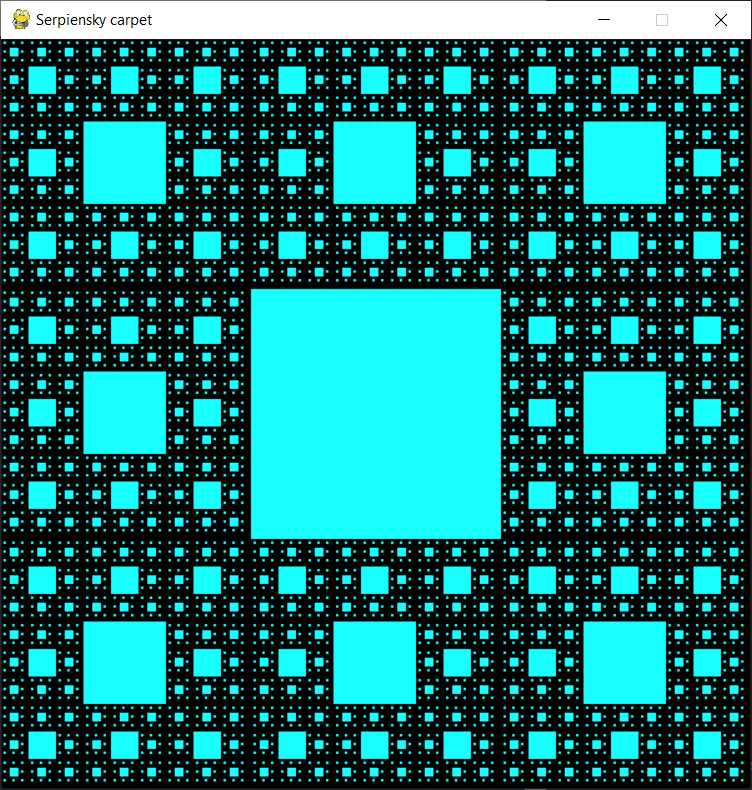

### Кривая Коха

In [16]:
koch_deepth = 0
def draw_koch_segment(t, length, level):
    global koch_deepth
    if length > 6 and level:
        ln3 = length // 3
        draw_koch_segment(t, ln3, level - 1)
        t.left(60)
        draw_koch_segment(t, ln3, level - 1)
        t.right(120)
        draw_koch_segment(t, ln3, level - 1)
        t.left(60)
        draw_koch_segment(t, ln3, level - 1)
    else:
        t.fd(length)
        t.left(60)
        t.fd(length)
        t.right(120)
        t.fd(length)
        t.left(60)
        t.fd(length)
        koch_deepth += 1
        level -= 1

        

def koch(turt,level, koch_time, koch_deep,is_testing = False):
    turt.reset()
    global koch_deepth
    koch_deepth = 0
    length = 120
    turt.speed(500)
    start = time.time()
    draw_koch_segment(turt, length,level)
    finish = round((time.time() - start)*1000)
    koch_time.append(finish)
    koch_deep.append(koch_deepth)
    if not is_testing:
        turtle.done()


limit = 5       
koch_time = []
koch_deep = []
try:
    turt = turtle.Turtle()
    turt.clear()
    for level in range(limit):
        koch(turt,level, koch_time, koch_deep, True)
    for i in range(limit):
        print("Глубина {1:2d} время --- {0:7d} ms --- глубина рекурсии {2}".format(koch_time[i], i + 1, koch_deep[i]))
    turt.clear()
except:
    print('Try again')

Глубина  1 время ---      78 ms --- глубина рекурсии 1
Глубина  2 время ---     347 ms --- глубина рекурсии 4
Глубина  3 время ---    1410 ms --- глубина рекурсии 16
Глубина  4 время ---    5604 ms --- глубина рекурсии 64
Глубина  5 время ---    5624 ms --- глубина рекурсии 64


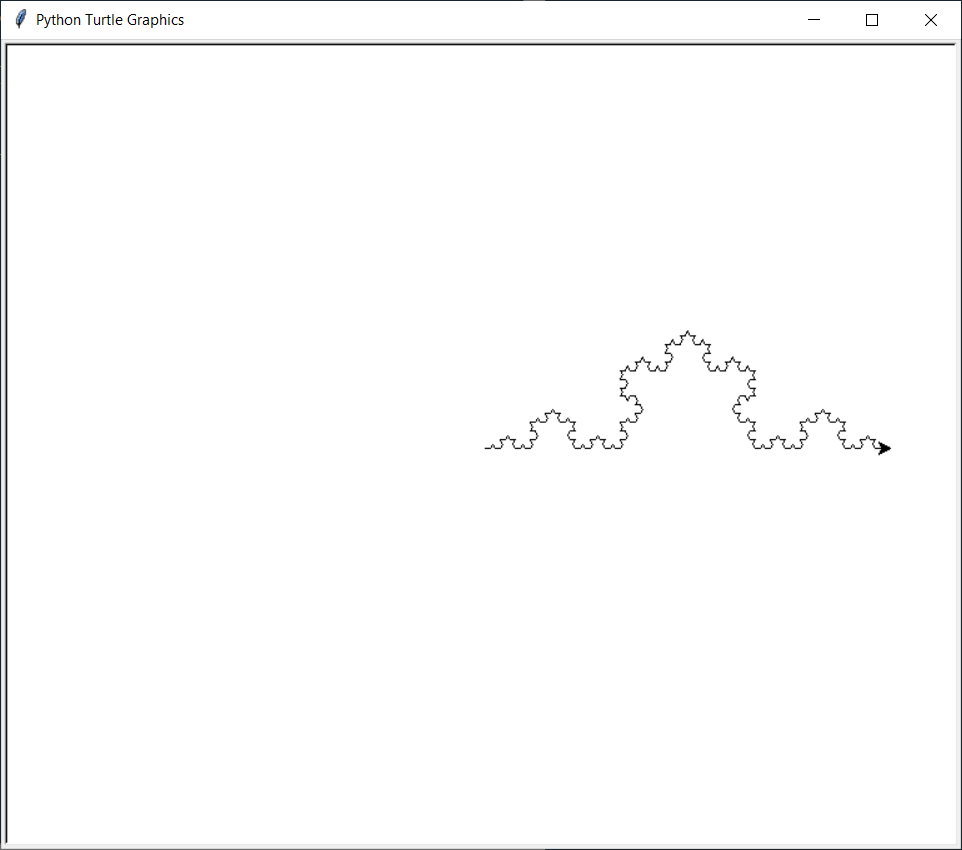

### Кривая Гильберта

In [17]:
axiom = "L"
rules = {"L":"+RF-LFL-FR+", "R":"-LF+RFR+FL-"}
limit = 5
angle = 90
try:
    t = turtle.Turtle()
    wn = turtle.Screen()
    wn.setup(600, 600)
    gilbert_time = []
    t.clear()
    for i in range(limit):
        l_main(t, wn, i, axiom, rules, angle, gilbert_time, is_testing = True)
    for i in range(limit):
            print("Глубина {1:2d} время --- {0:7d} ms --- ".format(gilbert_time[i], i + 1))
    t.clear()
except:
    print('try again')

Глубина  1 время ---       0 ms --- 
Глубина  2 время ---      77 ms --- 
Глубина  3 время ---     390 ms --- 
Глубина  4 время ---    1634 ms --- 
Глубина  5 время ---    6554 ms --- 


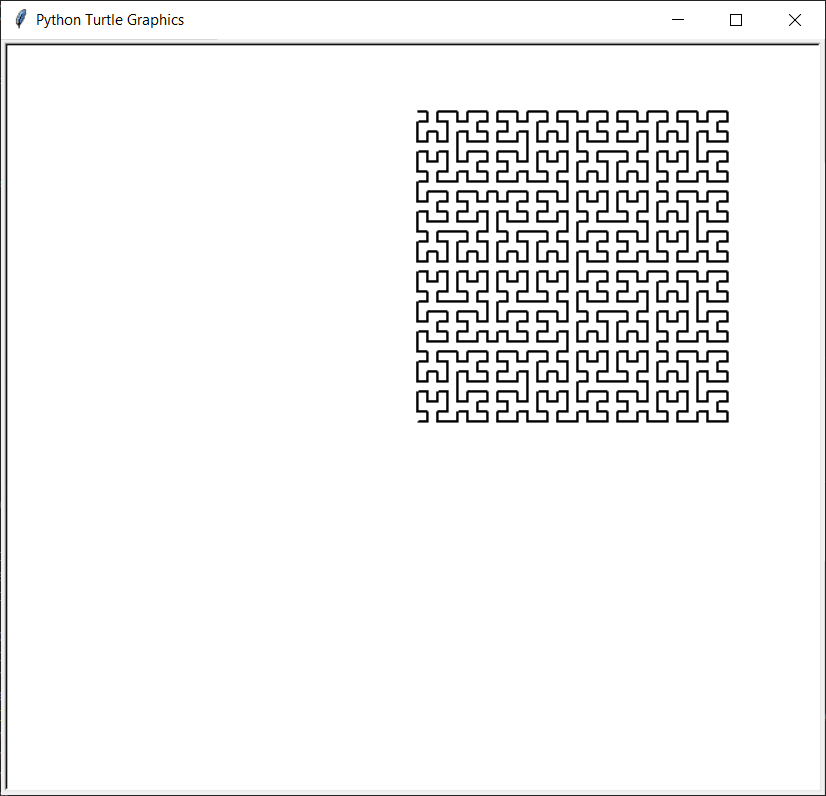

### Кривая Серпинского

In [20]:
axiom = "F+XF+F+XF"
rules = {"X":"XF-F+F-XF+F+XF-F+F-X"}
limit = 5 
angle = 90
try:
    t = turtle.Turtle()
    wn = turtle.Screen()
    wn.setup(600, 600)
    serp_line_time = []
    t.clear()
    for i in range(limit):
        l_main(t, wn, i, axiom, rules, angle, serp_line_time, is_testing = True)
    for i in range(limit):
            print("Глубина {1:2d} время --- {0:7d} ms --- ".format(serp_line_time[i], i + 1))
    t.clear()
except:
    print('try again')

Глубина  1 время ---      80 ms --- 
Глубина  2 время ---     441 ms --- 
Глубина  3 время ---    1853 ms --- 
Глубина  4 время ---    7513 ms --- 
Глубина  5 время ---   29885 ms --- 


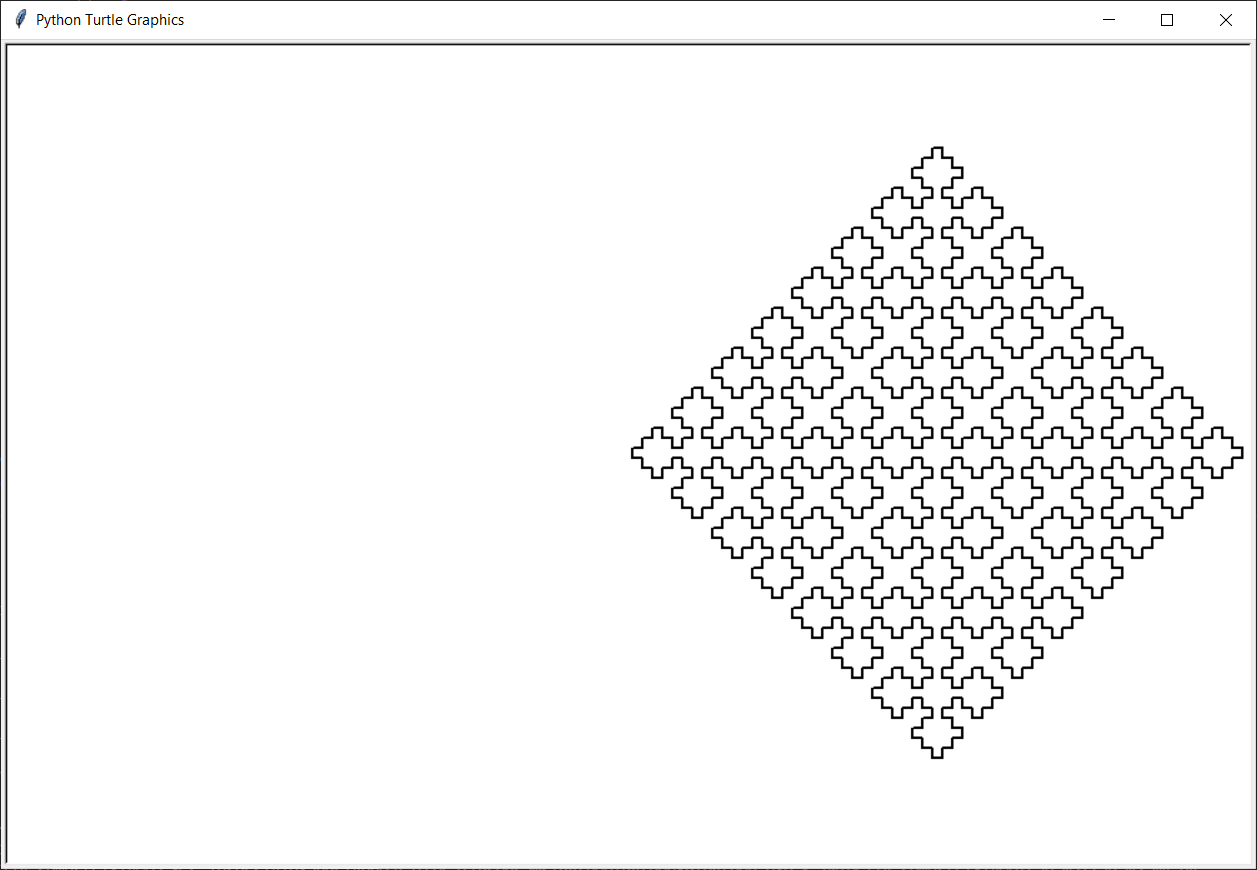

### Салфетка Серпинского

In [19]:
axiom = "FXF--FF--FF"
rules = {"F":"FF", "X":"--FXF++FXF++FXF--"}
limit = 5 
angle = 60
try:
    t = turtle.Turtle()
    wn = turtle.Screen()
    wn.setup(600, 600)
    serp_napkin_time = []
    t.clear()
    for i in range(limit):
        l_main(t, wn, i, axiom, rules, angle, serp_napkin_time, is_testing = True)
    for i in range(limit):
            print("Глубина {1:2d} время --- {0:7d} ms --- ".format(serp_napkin_time[i], i + 1))
    
except:
    print("try again")

Глубина  1 время ---     110 ms --- 
Глубина  2 время ---     333 ms --- 
Глубина  3 время ---    1019 ms --- 
Глубина  4 время ---    3036 ms --- 
Глубина  5 время ---    9021 ms --- 


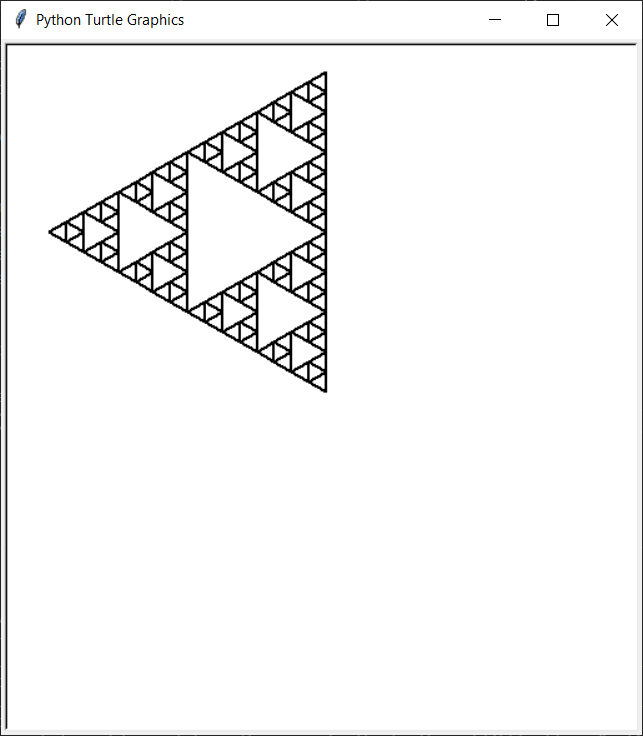

### Дерево Пифагора

In [21]:
axiom = "F"
rules = {"X":"XX", "F":"X[F]F", "[":"[", "]": "]"}
limit = 5

def create_l_tree(axiom, rules, level):
    if level == 0:
        return axiom
    else:
        result = ""
        for i in range(len(axiom)):
            result += rules[axiom[i]]
        return create_l_tree(result, rules, level - 1)

def draw_l_tree(t, inst, side = 20, angle = 45):
    order = []
    for symbol in inst:
        if symbol == "[":
            order.append(t.pos())
            order.append(t.heading())
            t.lt(angle)
        elif symbol == "]":
            t.up()
            t.setheading(order.pop())
            t.setpos(order.pop())
            t.down()
            t.rt(angle)
        else:
            t.fd(side)
            
def pifagor_tree(t, wn, level, axiom, rules, exe_time,angle=45, size=2, y_offset=0,
        x_offset=0, offset_angle=0, width=600, height=600, is_testing = False):
    inst = create_l_tree(axiom, rules,level)
    t.reset()
    t.up()
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(10000)
    t.pensize(size)
    start = time.time()
    draw_l_tree(t, inst)
    finish = round((time.time() - start)*1000)
    exe_time.append(finish)
    t.hideturtle()
    if not is_testing:
        wn.exitonclick()

try:
    t = turtle.Turtle()
    wn = turtle.Screen()
    wn.setup(600, 600)
    pifagor_time = []
    t.reset()
    for i in range(limit):
        pifagor_tree(t, wn, i, axiom, rules, pifagor_time, is_testing = True)
    for i in range(limit):
            print("Глубина {1:2d} время --- {0:7d} ms --- ".format(pifagor_time[i], i + 1))
    t.reset()
except:
    print("try again")

    

Глубина  1 время ---      11 ms --- 
Глубина  2 время ---     101 ms --- 
Глубина  3 время ---     292 ms --- 
Глубина  4 время ---     703 ms --- 
Глубина  5 время ---    1567 ms --- 


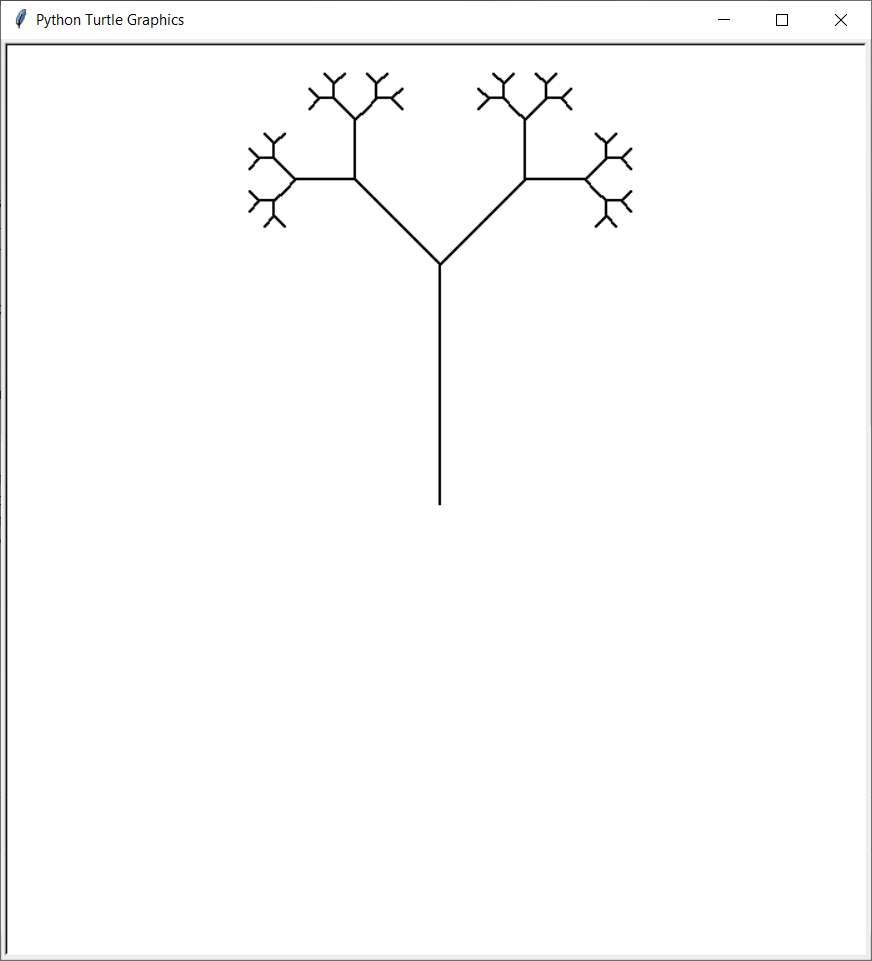

### Вывод

In [24]:
result = []
result.append(serp_carpet_time)
result.append(koch_time)
result.append(gilbert_time)
result.append(serp_line_time)
result.append(serp_napkin_time)
result.append(pifagor_time)

print("Глубина                      время, ms    ".format(pifagor_time[i], i + 1))
length = len(result[0])
for i in result:
    if len(i) < length:
        length = len(i)
    
for i in range(length):
    print('{0:2d}'.format(i), end = '  ')
    for j in range(len(result)):
        print("- {0:5d} - ".format(result[j][i]), end = ' ')
    print('')
    

Глубина                      время, ms    
 0  -     0 -  -    78 -  -     0 -  -    80 -  -   110 -  -    11 -  
 1  -     0 -  -   347 -  -    77 -  -   441 -  -   333 -  -   101 -  
 2  -     1 -  -  1410 -  -   390 -  -  1853 -  -  1019 -  -   292 -  
 3  -     3 -  -  5604 -  -  1634 -  -  7513 -  -  3036 -  -   703 -  
 4  -    22 -  -  5624 -  -  6554 -  - 29885 -  -  9021 -  -  1567 -  
